In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("mobile_clean.csv")

In [3]:
df.head()

,Unnamed: 0,Brand,Name,Ratings,Reviews,Source,Price,RAM_GB
0,0,Samsung,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",4.0,6358,amazon,6499,4.0
1,1,POCO,"POCO C71, Cool Blue (6GB, 128GB)",3.9,71,amazon,6999,6.0
2,2,Nokia,Nokia 105 Classic | Single SIM Keypad Phone wi...,3.8,19235,amazon,999,1.0
3,3,OnePlus,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",4.2,9101,amazon,16999,8.0
4,4,Motorola,"Motorola G05 4G (Forest Green, 4GB RAM, 64GB S...",3.8,218,amazon,7586,4.0


In [4]:
x=df[["Brand"]]
y=df["Price"]


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:
le_source = LabelEncoder()
#x["Source"] = le_source.fit_transform(x["Source"])
x["Brand"] = le_source.fit_transform(x["Brand"])

In [7]:
le_brand = LabelEncoder()
y = le_brand.fit_transform(y)

In [8]:
scaler = StandardScaler()
x[["Brand"]] = scaler.fit_transform(x[["Brand"]])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

In [11]:
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(), 
    
}

In [12]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results[name] = {"Accuracy": acc, "F1 Score": f1}


In [13]:
results

{'Logistic Regression': {'Accuracy': 0.041666666666666664,
  'F1 Score': 0.006555328991822424},
 'SVM': {'Accuracy': 0.07083333333333333, 'F1 Score': 0.016965860134685044},
 'k-NN': {'Accuracy': 0.05416666666666667, 'F1 Score': 0.02932922741746271},
 'Random Forest': {'Accuracy': 0.1375, 'F1 Score': 0.0816553963967757}}

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your data
df = pd.read_csv('mobile_clean.csv')

# Define the target variable
target_column = 'Price'
y = df[target_column]

# Select feature columns (example - replace with your chosen features)
feature_columns = ["Brand","Ratings", "Reviews", "Source","RAM_GB"] 
X = df[feature_columns]

le_source = LabelEncoder()
#x["Source"] = le_source.fit_transform(x["Source"])
X["Brand"] = le_source.fit_transform(X["Brand"])
X["Source"] = le_source.fit_transform(X["Source"])

scaler = StandardScaler()
X[["Brand","Ratings", "Reviews", "Source","RAM_GB"]] = scaler.fit_transform(X[["Brand","Ratings", "Reviews", "Source","RAM_GB"]])



# Optional: Feature Importance using RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Importances:
 Reviews    0.331224
Ratings    0.283852
Brand      0.233404
RAM_GB     0.100262
Source     0.051258
dtype: float64


In [15]:
from sklearn.metrics import accuracy_score

# Train with all features
model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model_all.predict(X_test))
print("Accuracy with all features:", acc_all)

# Train with top 3 features
X_top3 = X[["Reviews", "Ratings", "Brand","RAM_GB"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model_top3 = RandomForestClassifier(random_state=42)
model_top3.fit(X_train3, y_train3)
acc_top3 = accuracy_score(y_test3, model_top3.predict(X_test3))
print("Accuracy with top 3 features:", acc_top3)

# Train with top 4 (add RAM_GB)
X_top4 = X[["Reviews", "Ratings", "Brand", "RAM_GB"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

model_top4 = RandomForestClassifier(random_state=42)
model_top4.fit(X_train4, y_train4)
acc_top4 = accuracy_score(y_test4, model_top4.predict(X_test4))
print("Accuracy with top 4 features:", acc_top4)


Accuracy with all features: 0.35833333333333334
Accuracy with top 3 features: 0.35
Accuracy with top 4 features: 0.35


In [16]:
from sklearn.metrics import accuracy_score

# Train with all features
model_all = LogisticRegression(max_iter=1000)
model_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model_all.predict(X_test))
print("Accuracy with all features:", acc_all)

# Train with top 3 features
X_top3 = X[["Reviews", "Ratings", "Brand"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model_top3 = RandomForestClassifier(random_state=42)
model_top3.fit(X_train3, y_train3)
acc_top3 = accuracy_score(y_test3, model_top3.predict(X_test3))
print("Accuracy with top 3 features:", acc_top3)

# Train with top 4 (add RAM_GB)
X_top4 = X[["Reviews", "Ratings", "Brand", "RAM_GB"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

model_top4 = RandomForestClassifier(random_state=42)
model_top4.fit(X_train4, y_train4)
acc_top4 = accuracy_score(y_test4, model_top4.predict(X_test4))
print("Accuracy with top 4 features:", acc_top4)

Accuracy with all features: 0.07916666666666666
Accuracy with top 3 features: 0.24166666666666667
Accuracy with top 4 features: 0.35


In [17]:
from sklearn.metrics import accuracy_score

# Train with all features
model_all = SVC()
model_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model_all.predict(X_test))
print("Accuracy with all features:", acc_all)

# Train with top 3 features
X_top3 = X[["Reviews", "Ratings", "Brand"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model_top3 = RandomForestClassifier(random_state=42)
model_top3.fit(X_train3, y_train3)
acc_top3 = accuracy_score(y_test3, model_top3.predict(X_test3))
print("Accuracy with top 3 features:", acc_top3)

# Train with top 4 (add RAM_GB)
X_top4 = X[["Reviews", "Ratings", "Brand", "RAM_GB"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

model_top4 = RandomForestClassifier(random_state=42)
model_top4.fit(X_train4, y_train4)
acc_top4 = accuracy_score(y_test4, model_top4.predict(X_test4))
print("Accuracy with top 4 features:", acc_top4)

Accuracy with all features: 0.10416666666666667
Accuracy with top 3 features: 0.24166666666666667
Accuracy with top 4 features: 0.35


In [18]:
from sklearn.metrics import accuracy_score

# Train with all features
model_all = KNeighborsClassifier()
model_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model_all.predict(X_test))
print("Accuracy with all features:", acc_all)

# Train with top 3 features
X_top3 = X[["Reviews", "Ratings", "Brand"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model_top3 = RandomForestClassifier(random_state=42)
model_top3.fit(X_train3, y_train3)
acc_top3 = accuracy_score(y_test3, model_top3.predict(X_test3))
print("Accuracy with top 3 features:", acc_top3)

# Train with top 4 (add RAM_GB)
X_top4 = X[["Reviews", "Ratings", "Brand", "RAM_GB"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

model_top4 = RandomForestClassifier(random_state=42)
model_top4.fit(X_train4, y_train4)
acc_top4 = accuracy_score(y_test4, model_top4.predict(X_test4))
print("Accuracy with top 4 features:", acc_top4)

Accuracy with all features: 0.20833333333333334
Accuracy with top 3 features: 0.24166666666666667
Accuracy with top 4 features: 0.35


In [19]:
from sklearn.metrics import accuracy_score

# Train with all features
model_all = RandomForestClassifier()
model_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, model_all.predict(X_test))
print("Accuracy with all features:", acc_all)

# Train with top 3 features
X_top3 = X[["Reviews", "Ratings", "Brand"]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

model_top3 = RandomForestClassifier(random_state=42)
model_top3.fit(X_train3, y_train3)
acc_top3 = accuracy_score(y_test3, model_top3.predict(X_test3))
print("Accuracy with top 3 features:", acc_top3)

# Train with top 4 (add RAM_GB)
X_top4 = X[["Reviews", "Ratings", "Brand", "RAM_GB"]]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

model_top4 = RandomForestClassifier(random_state=42)
model_top4.fit(X_train4, y_train4)
acc_top4 = accuracy_score(y_test4, model_top4.predict(X_test4))
print("Accuracy with top 4 features:", acc_top4)

Accuracy with all features: 0.37083333333333335
Accuracy with top 3 features: 0.24166666666666667
Accuracy with top 4 features: 0.35


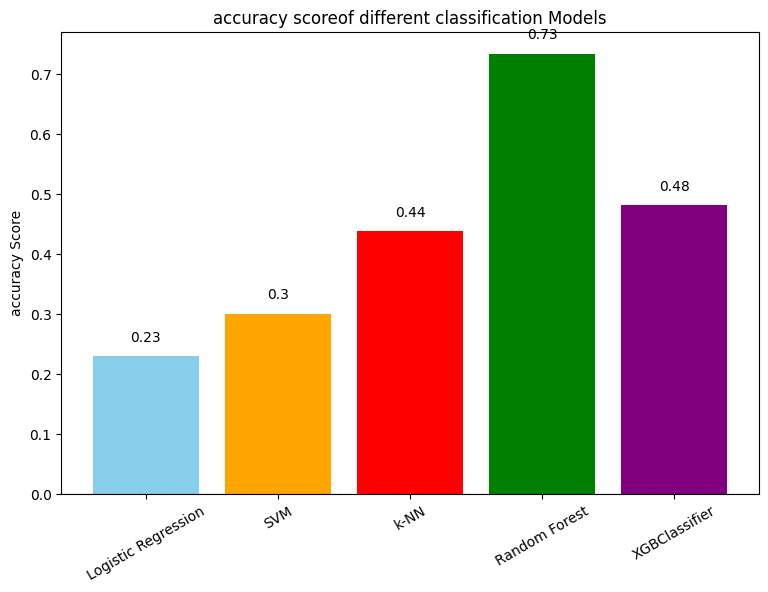

In [21]:
import matplotlib.pyplot as plt

r2_scores = {
   "Logistic Regression":0.22916666666666666 ,
    "SVM":0.3 ,
    "k-NN":0.4375,
    "Random Forest":0.7333333333333333 , 
    "XGBClassifier": 0.4811715481171548
}

plt.figure(figsize=(9,6))
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color=['skyblue', 'orange', 'red', 'green', 'purple'])
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # baseline at 0
plt.title("accuracy scoreof different classification Models")
plt.ylabel("accuracy Score")
plt.xticks(rotation=30)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [23]:
param_grid = {
    "n_estimators": [100, 200, 300, 500],       
    "max_depth": [None, 10, 20, 30, 50],  
    "min_samples_split": [2, 5, 10],             
    "min_samples_leaf": [1, 2, 4],               
    "max_features": ["sqrt", "log2"]         
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,              
    scoring="accuracy",  
    n_jobs=-1,        
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


In [ ]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (weighted):", f1_score(y_test, y_pred, average="weighted"))
